<a href="https://colab.research.google.com/github/ViniciusSilveiraCampos/Classifica-o-de-Iris-/blob/main/Vizinhos_Proximos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORTAÇÕES

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from numpy.lib.type_check import nan_to_num

In [15]:
import seaborn as sns

In [16]:
import pandas as pd

In [17]:
Data = open('iris.data', 'r')

1. comprimento da sépala em cm
2. largura da sépala em cm
3. comprimento da pétala em cm
4. largura da pétala em cm
5. aula:
  - Iris Setosa
  - Iris Versicolor
  - Íris Virgínia

In [18]:
Classes = ['sépala_comprimento', 'sépala_largura', 'petala_comprimento','petala_largura', 'classe']

In [19]:
items = [item.strip('\n').split(',') for item in Data]

In [20]:
DADOS = pd.DataFrame(items,
                   columns= Classes)

In [21]:
DADOS.head()

,sépala_comprimento,sépala_largura,petala_comprimento,petala_largura,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## CORRELAÇÃO

<Axes: xlabel='classe', ylabel='count'>

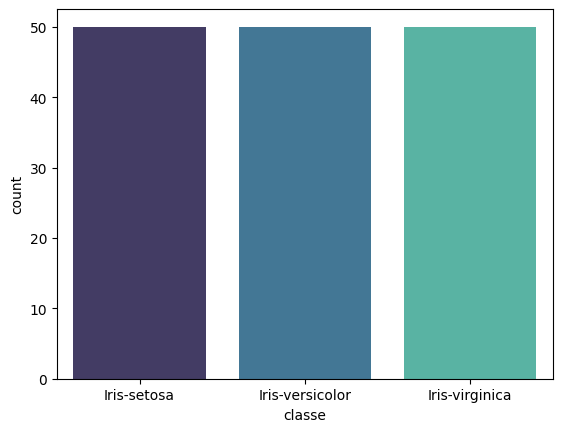

In [22]:
sns.countplot(DADOS, x='classe', palette='mako')

In [23]:
Valores = DADOS.iloc[:, 0:4]
Classes = DADOS.iloc[:, 4]

In [24]:
Classes

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: classe, Length: 150, dtype: object

In [25]:
Valores_train, Valores_test, Classes_train, Classes_test = train_test_split(Valores, Classes, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(Valores_train)
X_train = nan_to_num(X_train)

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, Classes_train)
atual = scaler.transform(Valores_test)
atual = nan_to_num(atual)
atual = knn_classifier.predict(atual)

In [26]:
atual

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [27]:
print('Precisão: %f' % (np.mean(atual == Classes_test)))

Precisão: 1.000000


In [28]:
matriz = confusion_matrix(atual, Classes_test)

<Axes: >

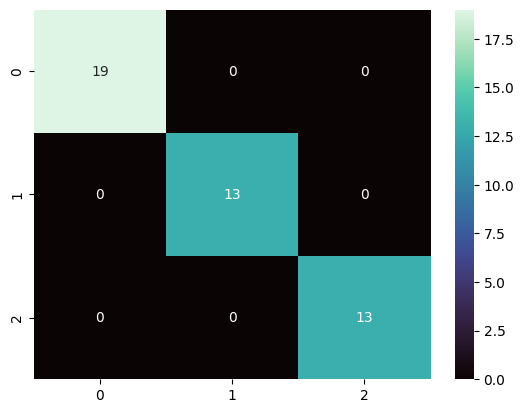

In [29]:
sns.heatmap(matriz, cmap='mako', annot=True)